In [72]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
#уточним рабочую директорию
os.getcwd()

'C:\\Users\\bkunt\\jupyter\\karpov'

In [ ]:
#укажем путь, с которого нужно начать поиск
main_path = 'C:/Users/bkunt/jupyter/karpov/4_data/data'

In [65]:
#создадим пустой датафрейм и запустим рекурсивный поиск
full_df = pd.DataFrame()
for path, dirs, files in os.walk(main_path):
    #проверка на наличие файлов
    if files == []:
        continue
    #если файл существует, считываем его и записываем во временный датафрейм, добавляя дополнительную информацию
    else:
        temp_df = pd.read_csv(path + '/' + 'data.csv')
        temp_df['name'] = path.split('\\')[-1]
        temp_df['date'] = path.split('\\')[-2]
        full_df = pd.concat([full_df, temp_df])
    #сбросим индексы и удалим лишнюю колонку
    full_df.reset_index(drop=True, inplace=True)
    full_df.drop(columns=['Unnamed: 0'], inplace=True)

In [66]:
full_df

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09
157,39,2,Rostislav_Petrov,2020-12-09
158,82,4,Vasiliy_Ivanov,2020-12-09
159,74,2,Vasiliy_Ivanov,2020-12-09


In [71]:
#топ-5 покупателей
full_df.groupby('name') \
       .agg({'quantity': 'sum'}) \
       .sort_values('quantity', ascending=False).head()

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28


<AxesSubplot:xlabel='product_id', ylabel='quantity'>

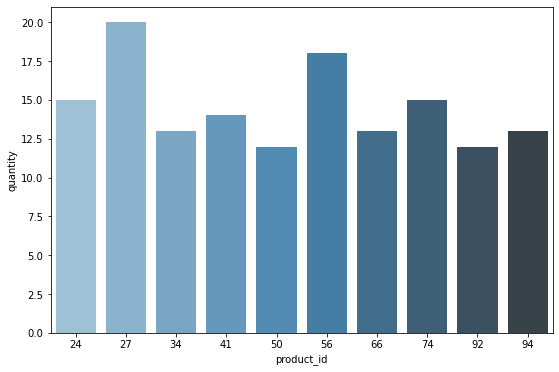

In [98]:
#топ-10 товаров по числу проданных единиц за всё время
popular_items = full_df.groupby('product_id') \
                       .agg({'quantity': 'sum'}) \
                       .sort_values('quantity', ascending=False) \
                       .reset_index().head(10)

plt.figure(figsize=(9, 6))
sns.barplot(x='product_id', y='quantity', data=popular_items, palette="Blues_d")

<AxesSubplot:xlabel='date', ylabel='quantity'>

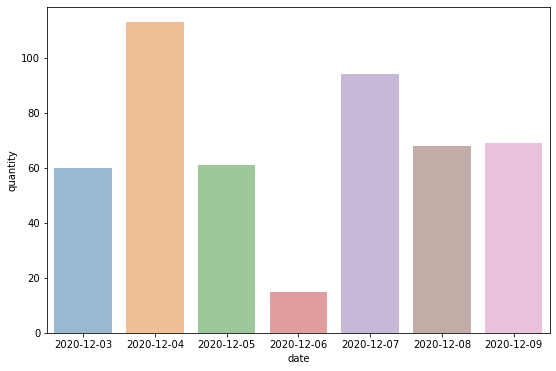

In [99]:
#посмотрим на продажи по дням
sales_by_day = full_df.groupby('date') \
                      .agg({'quantity': 'sum'}) \
                      .sort_values('date').head(10) \
                      .reset_index()

plt.figure(figsize=(9, 6))
sns.barplot(x='date', y='quantity', data=sales_by_day, alpha=0.5)

In [127]:
full_df.head()

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03


In [128]:
full_df.drop_duplicates(subset=['product_id', 'date']).head()

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03


In [142]:
#определим, сколько пользователей совершили повторные покупки в разные дни
full_df.drop_duplicates(subset=['product_id', 'name', 'date']) \
       .groupby(['product_id', 'name']) \
       .agg({'date': 'count'}) \
       .rename(columns={'date': 'orders'}) \
       .query('orders > 1')

,,orders
product_id,name,
15,Anton_Ivanov,2
94,Petr_Fedorov,2
